In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [ ]:
np.random.seed(1234)

In [ ]:
df = pd.read_csv('all-data.csv', encoding='ISO-8859-1')
df.columns = ['sentiment','headlines']
df.head()

,sentiment,headlines
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [ ]:
plt.style.use('dark_background')

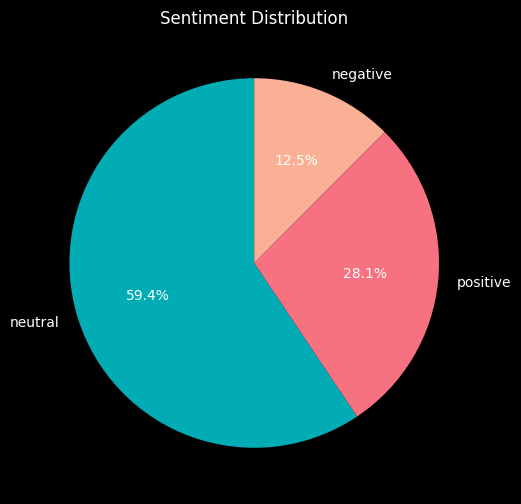

In [ ]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#01ACB5', '#F67280', '#F9B095'])
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
target_map = {'positive':1,'negative':0, 'neutral':2}
df['target'] = df['sentiment'].map(target_map)

In [ ]:
df.head()

,sentiment,headlines,target
0,neutral,Technopolis plans to develop in stages an area...,2
1,negative,The international electronic industry company ...,0
2,positive,With the new production plant the company woul...,1
3,positive,According to the company 's updated strategy f...,1
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,1


In [ ]:
df_train, df_test = train_test_split(df)

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)

In [ ]:
X_train = vectorizer.fit_transform(df_train['headlines'])
X_test = vectorizer.transform(df_test['headlines'])

In [ ]:
Y_train = df_train['target']
Y_test = df_test['target']

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print('Train Accuracy:', model.score(X_train,Y_train))
print('Test Accuracy:', model.score(X_test,Y_test))

Train Accuracy: 0.8568676025323424
Test Accuracy: 0.7656765676567657


In [ ]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)
print('Train AUC:', roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print('Test AUC:', roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9625968373853525
Test AUC: 0.8635789148509646


In [ ]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.60175055, 0.06345733, 0.33479212],
       [0.0111336 , 0.70647773, 0.28238866],
       [0.00411335, 0.0178245 , 0.97806216]])

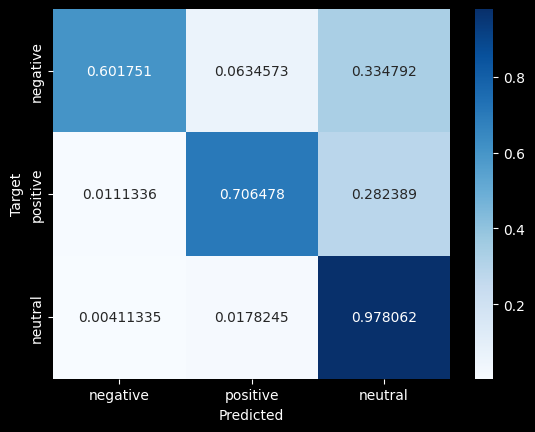

In [ ]:
def plot_cm(cm):
    classes = ['negative', 'positive','neutral']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Target')

plot_cm(cm)

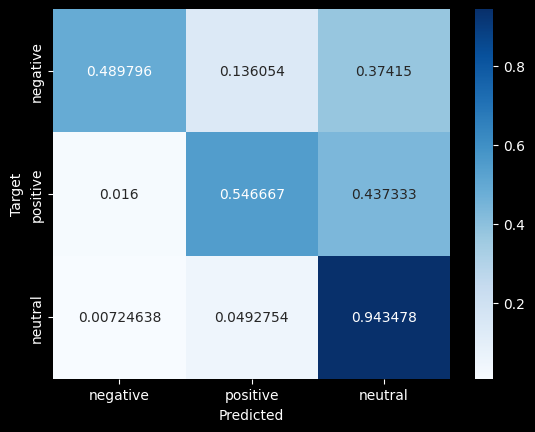

In [ ]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

### Binary Labels

In [ ]:
binary_tar_list = [target_map['positive'], target_map['negative']]
df_b = df[df['target'].isin(binary_tar_list)]
df_b_train = df_train[df_train['target'].isin(binary_tar_list)]
df_b_test = df_test[df_test['target'].isin(binary_tar_list)]

In [ ]:
df_b_train.head()

,sentiment,headlines,target
4639,negative,"In Q1 of 2009 , Bank of +_land 's net interest...",0
1049,positive,"Kai Tulonen , Chief Technology Officer , SysOp...",1
617,positive,4G allows customers to use mobile broadband se...,1
4800,negative,Operating profit in the fourth quarter went do...,0
4425,negative,"The currency effect had a 3.0 pct , or 20 mln ...",0


In [ ]:
X_train = vectorizer.fit_transform(df_b_train['headlines'])
X_test = vectorizer.transform(df_b_test['headlines'])

In [ ]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print('Train Accuracy:', model.score(X_train, Y_train))
print('Test Accuracy:', model.score(X_test, Y_test))

Train Accuracy: 0.8816608996539792
Test Accuracy: 0.8352490421455939


In [ ]:
Pr_train = model.predict_proba(X_train)[:,1]
Pr_test = model.predict_proba(X_test)[:,1]
print('Train AUC:', roc_auc_score(Y_train,Pr_train))
print('Test AUC:', roc_auc_score(Y_test, Pr_test))

Train AUC: 0.9842176135507934
Test AUC: 0.9179319727891156


In [ ]:
# weights of the training model
model.coef_

array([[ 0.30948756,  0.2872003 ,  0.00686764, ...,  0.12014138,
         0.22413875, -0.07691806]])

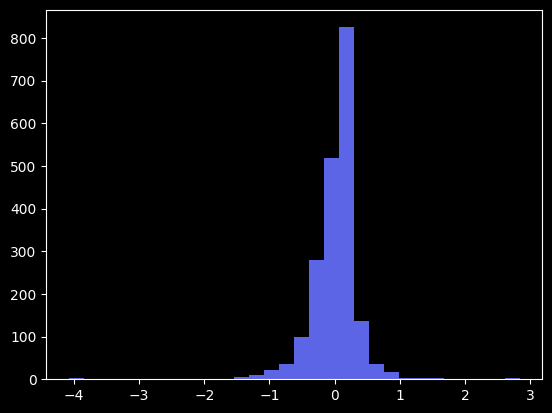

In [ ]:
plt.hist(model.coef_[0], color='#5B65E5', bins=30);

In [ ]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'in': 902,
 'q1': 1450,
 'of': 1244,
 '2009': 47,
 'bank': 282,
 '_land': 142,
 'net': 1202,
 'interest': 941,
 'income': 911,
 'by': 361,
 '10': 10,
 'to': 1838,
 'eur': 644,
 'mn': 1172,
 'kai': 989,
 'tulonen': 1871,
 'chief': 401,
 'technology': 1782,
 'officer': 1251,
 'sysopen': 1758,
 'digia': 555,
 'says': 1585,
 'we': 1949,
 'have': 842,
 'been': 298,
 'using': 1907,
 'corporate': 491,
 'since': 1645,
 'last': 1019,
 'fall': 707,
 'and': 230,
 'very': 1921,
 'satisfied': 1580,
 'with': 1974,
 'the': 1808,
 'results': 1536,
 '4g': 95,
 'allows': 210,
 'customers': 516,
 'use': 1902,
 'mobile': 1173,
 'broadband': 349,
 'services': 1615,
 'up': 1892,
 'ten': 1797,
 'times': 1832,
 'higher': 861,
 'than': 1805,
 'today': 1839,
 '3g': 81,
 'operating': 1269,
 'profit': 1419,
 'fourth': 757,
 'quarter': 1456,
 'went': 1958,
 'down': 574,
 'eur3m': 660,
 'from': 764,
 'eur4': 661,
 'for': 744,
 'corresponding': 493,
 'period': 1329,
 'as': 253,
 'it': 964,
 'included': 907,
 'costs

In [ ]:
threshold = 0.5
pos_words = ""
print('Most positive words:')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)
        pos_words += word + " "

Most positive words:
to 0.6035495876109912
technology 0.7866948377845946
says 0.57124133079487
we 0.8757895570894338
and 1.31157866762853
with 1.5826007286635657
mobile 0.6084334982370051
services 0.8031840042350654
up 2.835850850786846
higher 0.5908992412446876
growth 1.0154652283830439
solution 0.5137758164745541
world 0.5407810733717243
engineering 0.6147760847685211
awarded 0.9258483410424589
contract 0.6998860417173104
its 0.7912645223066253
well 0.6411884341614964
business 0.9082437104401693
supply 0.7532044822040767
new 1.3057233808724322
increase 2.3359827282809706
capacity 0.69551033718537
improve 0.5854948294625285
nokia 0.5121335094967264
rose 2.6904496201132178
percent 0.5306842010899917
13 0.6655648752531603
won 0.8180180582095736
orders 0.501498200086671
2011 0.6975993704733443
our 0.8147456257130421
positive 0.8615765703875649
good 0.6713603512338395
both 0.9239073365519197
increased 1.8158359057058777
order 0.9107987960631854
position 0.5458410598971202
design 0.5084032

In [ ]:
neg_words = ""
print("Most negative words")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)
        neg_words += word + " "

Most negative words
of -0.5611372469368457
10 -0.6506459777216486
fall -1.1724146086052643
the -0.6516366286558207
than -0.9852394631032333
profit -0.8190321359244274
quarter -0.5731069182355627
down -3.9577462224535442
eur4 -0.5072472628720435
had -1.2007292980189348
pct -0.5313837340062576
negative -0.9844236181457329
on -0.8123311261409085
2008 -1.2645839129253154
finnish -0.765272154427268
earlier -0.503290274591018
cut -1.3168372380220106
conditions -0.5110123422444979
situation -0.9471252586116271
result -1.2613211878702846
negotiations -0.9201942492287363
employment -0.7391411190654666
employees -1.0387145632802184
at -0.6127062509315745
would -0.8046508640640044
be -0.7251909440856543
production -0.6243655777070136
declined -1.2158960559863696
lower -1.6834256180330187
prices -0.9450729925545154
loss -0.9717739076179664
people -0.7751332114146221
however -0.5176211619719729
finland -0.9725055397101406
while -0.6041885901488645
decreased -4.079492008322413
march -0.9431744131949

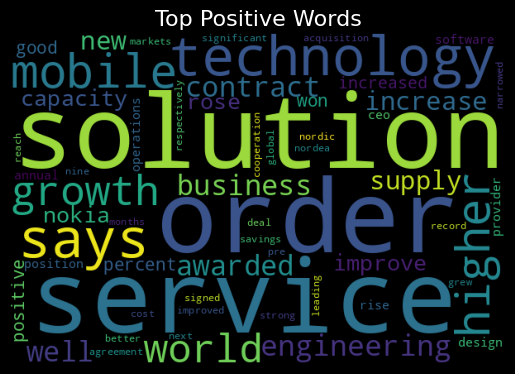

In [ ]:
wordcloud =  WordCloud(width=600, height=400).generate(pos_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Top Positive Words", fontsize=16)
plt.show()

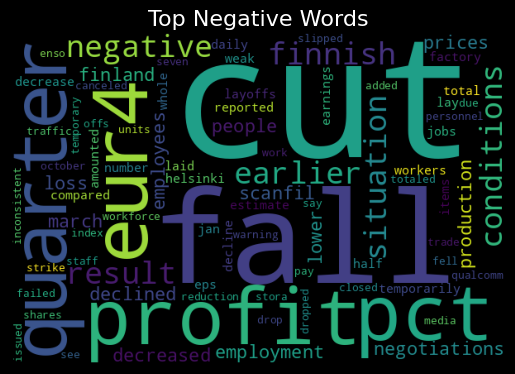

In [ ]:
wordcloud =  WordCloud(width=600, height=400).generate(neg_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Top Negative Words", fontsize=16)
plt.show()